<a href="https://colab.research.google.com/github/monsegutier/Grupo4-PP1--Proyecto-ML/blob/main/PP1_GRUPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Atack Prediction




## Descripcion caracteristicas

**Aim :** predecir el resultado de un ataque cardíaco

Features:

**Age :** Edad del paciente

**Sex :** Sexo del paciente.

**cp :** tipo de dolor en el pecho:

Valor 0: angina típica

Valor 1: angina atípica

Valor 2: dolor no anginoso

Valor 3: asintomático


**trtbps :** presión arterial en reposo (en mm Hg)

**chol :** colesterol en mg/dl obtenido mediante el sensor de IMC

**fbs :** (azúcar en sangre en ayunas > 120 mg/dl)

1 = verdadero

0 = falso

**rest_ecg :** resultados electrocardiográficos en reposo:

Valor 0: normal

Valor 1: tener anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV)

Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes

**thalach :** frecuencia cardíaca máxima alcanzada.

**exang :** angina inducida por el ejercicio:

1 = si

0 = no

**oldpeak :** depresión del ST inducida por el ejercicio en relación con el reposo.

Depresión del ST: un tipo de anomalía del segmento ST. El segmento ST es la parte plana e isoeléctrica del ECG y representa el intervalo entre la despolarización y la repolarización ventricular.


**slp :** la pendiente del segmento ST del ejercicio máximo

0 = sin pendiente

1 = plano

2 = descendente

**caa :** number of major vessels (0-3)
thall - Thalium Stress Test result ~ (0,3)

**thall :** Talasemia(es un trastorno sanguíneo genético que se caracteriza por una tasa de hemoglobina más baja de lo normal.)

0 = nulo

1 = defecto reparado

2 = normales

3 = defecto reversible

**output :** diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfica)

0: < 50% de estrechamiento del diámetro. menos posibilidades de enfermedad cardíaca

1: > 50% de estrechamiento del diámetro. más posibilidades de sufrir enfermedades cardíacas

## Imports

In [ ]:
!pip install ydata-profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px


from ydata_profiling import ProfileReport

# df = pd.read_csv('/content/heart.csv')

from google.colab import files
import pandas as pd
import io  # Importa el módulo io





## Carga dataset

In [ ]:
# Para subir archivos de la pc

# # Permite a los usuarios seleccionar un archivo CSV desde su PC
# uploaded = files.upload()

# # Obtiene el nombre del archivo cargado
# file_name = list(uploaded.keys())[0]

# # Carga el archivo CSV en un DataFrame de Pandas
# df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# https://raw.githubusercontent.com/crlsh/datasets/main/heart.csv

# !!!  unificar datasets en esp o ingles

# Reemplaza esta URL con la URL de tu archivo CSV en GitHub
github_url_ingles = 'https://raw.githubusercontent.com/crlsh/datasets/main/heart.csv'
github_url_esp2 = 'https://raw.githubusercontent.com/monsegutier/Grupo4-PP1--Proyecto-ML/main/data/heart2.csv'
github_url_esp ="https://raw.githubusercontent.com/monsegutier/Grupo4-PP1--Proyecto-ML/main/data/heart_dataset.csv"
# Carga el archivo CSV desde la URL en un DataFrame
df = pd.read_csv(github_url_ingles)
df2 = pd.read_csv(github_url_esp2)
df_dataset = pd.read_csv(github_url_esp)

In [ ]:
# Info dataset :
df = df.astype(int)
# df['oldpeak'] = df['oldpeak'].astype(int64)
df
print(df.head)
print("")
# columnas y tipos de datos
print(df.columns)
print("")
# Obtener los tipos de datos de cada columna
print ("nombre caracteristicas")
data_types = df.dtypes
print ("")

# Imprimir los tipos de datos
print ("Tipo de datos")
print(data_types)

<bound method NDFrame.head of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0        2    0   
1     37    1   2     130   250    0        1       187     0        3    0   
2     41    0   1     130   204    0        0       172     0        1    2   
3     56    1   1     120   236    0        1       178     0        0    2   
4     57    0   0     120   354    0        1       163     1        0    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1        0    1   
299   45    1   3     110   264    0        1       132     0        1    1   
300   68    1   0     144   193    1        1       141     0        3    1   
301   57    1   0     130   131    0        1       115     1        1    1   
302   57    0   1     130   236    0        0       174     0        0    1   

     caa  thall  outp

# ------ EDA ------

#Graficos

Estadísticas descriptivas para Age y trtbps:
              age      trtbps
count  303.000000  303.000000
mean    54.366337  131.623762
std      9.082101   17.538143
min     29.000000   94.000000
25%     47.500000  120.000000
50%     55.000000  130.000000
75%     61.000000  140.000000
max     77.000000  200.000000

Tabla de frecuencia para Sex:
1    207
0     96
Name: sex, dtype: int64

Tabla de frecuencia para cp:
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


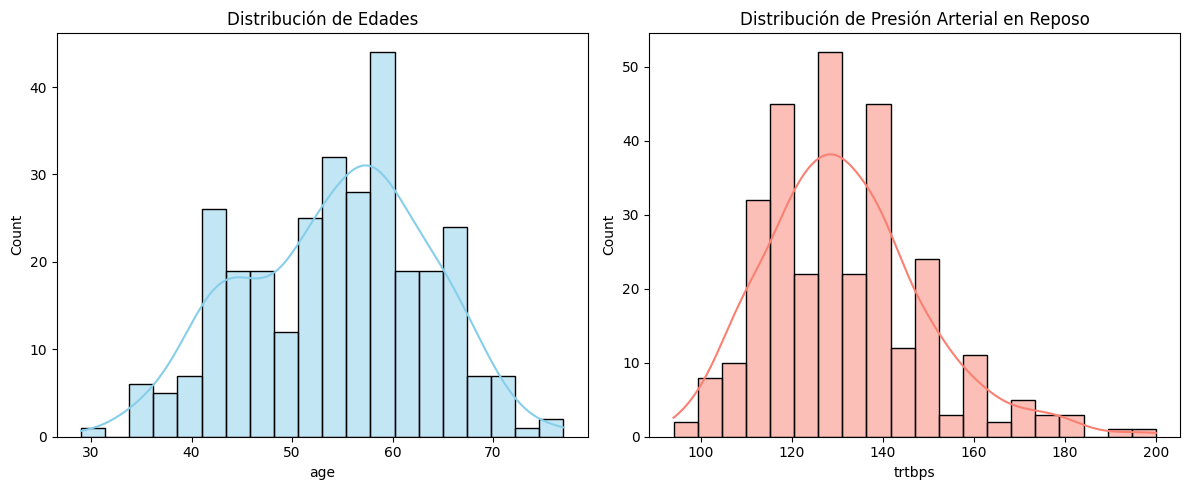

In [ ]:
# Estadísticas descriptivas para las variables numéricas (Age y trtbps)
estadisticas_numericas = df[['age', 'trtbps']].describe()

# Tablas de frecuencia para las variables categóricas (Sex y cp)
tabla_frecuencia_sex = df['sex'].value_counts()
tabla_frecuencia_cp = df['cp'].value_counts()
print("Estadísticas descriptivas para Age y trtbps:")
print(estadisticas_numericas)
print("\nTabla de frecuencia para Sex:")
print(tabla_frecuencia_sex)
print("\nTabla de frecuencia para cp:")
print(tabla_frecuencia_cp)

# Histogramas para `Age` y `trtbps`
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades')

plt.subplot(1, 2, 2)
sns.histplot(df['trtbps'], bins=20, kde=True, color='salmon')
plt.title('Distribución de Presión Arterial en Reposo')
plt.tight_layout()

plt.show()

#Test chi cuadrado


 Para determinar si dos variables categóricas o nominales pueden estar o no relacionadas.

 H0) Las variables sno independientes.

 H1) Las variables no son independientes.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

#contamos la cant de hombres y mujeres, tomando como 1 y 0 respectivamente, con y sin diagnostico
hombres_con = df[(df['sex'] == 1) & (df['output'] == 1)]['output'].count()
hombres_sin = df[(df['sex'] == 1) & (df['output'] == 0)]['output'].count()
mujeres_con = df[(df['sex'] == 0) & (df['output'] == 1)]['output'].count()
mujeres_sin = df[(df['sex'] == 0) & (df['output'] == 0)]['output'].count()

#Ver si los datos tienen más de cinco conteos en cada combinación
#print(hombres_con_enfermedad, hombres_sin_enfermedad,mujeres_con_enfermedad, mujeres_sin_enfermedad)
#tabla de contingencia
data = np.array([[hombres_con, hombres_sin],
                 [mujeres_con, mujeres_sin]])
print (data)

#prueba de chi-cuadrado, nos calcula los valores esperados para cada combinación
chi2, p, _, _ = chi2_contingency(data)

print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

#Prueba (nivel de significancia de 0.05)
if p < 0.05:
    print("En base a la evidencia muestral la asociación es significativa\
    entre sexo del paciente y el diagnostico.")
else:
    print("No hay evidencia significativa de asociación.")

#relacion entre tipo de dolor y output
#tabla de contingencia entre "cp" y "output"
tabla_contingencia = pd.crosstab(df['cp'], df['output'])
print (tabla_contingencia)
# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(tabla_contingencia)

print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

#Prueba
if p < 0.05:
    print("En base a la evidencia muestral la asociación entre\
    el tipo de dolor y el diagnostico del paciente es significativa.")
else:
    print("No hay evidencia significativa")

#La variables sexo y tipo de dolor
tabla = pd.crosstab(df['sex'], df['cp'])

# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(tabla)

# Imprimir los resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

#Prueba
if p < 0.05:
    print("La asociación entre es significativa.")
else:
    print("No hay evidencia significativa de asociación entre el sexo y tipo de dolor.")

[[ 93 114]
 [ 72  24]]
Estadístico de chi-cuadrado: 22.717227046576355
Valor p: 1.8767776216941503e-06
En base a la evidencia muestral la asociación es significativa    entre sexo del paciente y el diagnostico.
output    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16
Estadístico de chi-cuadrado: 81.68642755194445
Valor p: 1.3343043373050064e-17
En base a la evidencia muestral la asociación entre    el tipo de dolor y el diagnostico del paciente es significativa.
Estadístico de chi-cuadrado: 6.822075813213287
Valor p: 0.07779031388551413
No hay evidencia significativa de asociación entre el sexo y tipo de dolor.


#Test t-studen

Para determinar si hay diferencias significativas en las variables numéricas y grupos de variables categoricas

Estadístico t: -0.9864931536208362
Valor p: 0.3246834797221042
No hay evidencia significativa de diferencia en la presión arterial en reposo entre hombres y mujeres.
Estadístico t: -3.5029368327219244
Valor p: 0.000529966610622664
Hay una diferencia significativa en el colesterol entre hombres y mujeres.


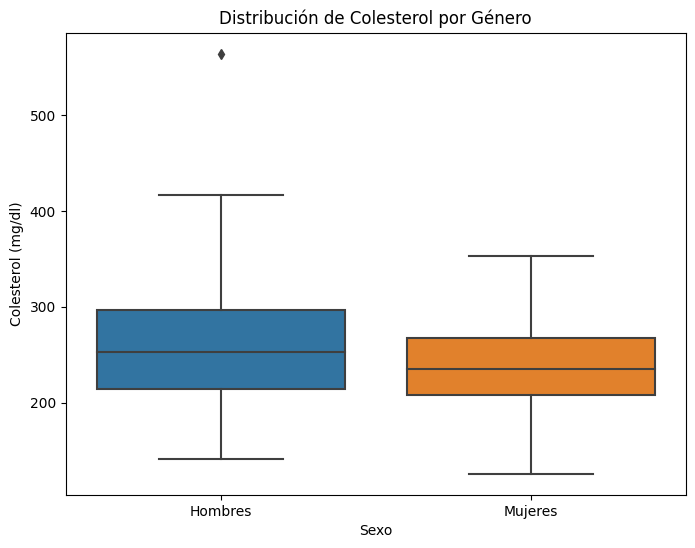

In [ ]:
#diferencias presión arterial en reposo) entre los diferentes generos
#Separaro los datos de presión arterial para hombres y mujeres
presion_hombres = df[df['sex'] == 1]['trtbps']
presion_mujeres = df[df['sex'] == 0]['trtbps']

#t de Student para dos muestras independientes
t_stat, p_valor = stats.ttest_ind(presion_hombres, presion_mujeres)


print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_valor}")

#Prueba
if p_valor < 0.05:
    print("Hay una diferencia significativa en la presión arterial en reposo entre hombres y mujeres.")
else:
    print("No hay evidencia significativa de diferencia en la presión arterial en reposo entre hombres y mujeres.")


#diferencias de colesterol entre los diferentes generos
#Separarolos datos de colesterol para hombres y mujeres
presion_hombres = df[df['sex'] == 1]['chol']
presion_mujeres = df[df['sex'] == 0]['chol']

#t de Student para dos muestras independientes
t_stat, p_valor = stats.ttest_ind(presion_hombres, presion_mujeres)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_valor}")

# Prueba
if p_valor < 0.05:
    print("Hay una diferencia significativa en el colesterol entre hombres y mujeres.")
else:
    print("No hay evidencia significativa de diferencia en el colesterol entre hombres y mujeres.")

#boxplot entre colesterol y género
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='chol', data=df)
plt.xlabel('Sexo')
plt.ylabel('Colesterol (mg/dl)')
plt.xticks([0, 1], ['Hombres', 'Mujeres'])
plt.title('Distribución de Colesterol por Género')
plt.show()

# -----MODELOS-----


# -- Regresion logistica --

In [ ]:
#https://github.com/monsegutier/Grupo4-PP1--Proyecto-ML/blob/main/data/heart_dataset.csv
# df_dataset = 'https://raw.githubusercontent.com/monsegutier//Grupo4-PP1--Proyecto-ML/main/data/heart_dataset.csv'


In [ ]:
# df_dataset = pd.read_csv(df_dataset)
print(df_dataset.columns)


Index(['Unnamed: 0', 'Edad', 'Genero', 'Dolor en pecho',
       'Presión arterial reposo', 'Colesterol', 'Glucemia',
       'Resultado ECC Reposo', 'Frecuencia Cardiaca', 'Angina por ejercicio',
       'Depresión de ST', 'Pendiente ST', 'Numero de vasos', 'Talasemia',
       'Diagnostico'],
      dtype='object')


In [ ]:
#creamos la variable objetivo

df_dataset['Diagnostico'].value_counts()

1    164
0    138
Name: Diagnostico, dtype: int64

In [ ]:
X = df_dataset.drop(['Diagnostico'], axis=1)
y = df_dataset['Diagnostico']

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter = 10000, verbose = 0)

In [ ]:
print(logit.fit(X,y))
print(logit.score(X,y))

LogisticRegression(max_iter=10000)
1.0


In [ ]:
# dividir X e y en sets de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# comprobar X_train y X_test
X_train.shape, X_test.shape

((211, 14), (91, 14))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# entrenamos un modelo de regresión logística en el conjunto de entrenamiento
from sklearn.linear_model import LogisticRegression

# instanciamos el modelo
logreg = LogisticRegression(solver='liblinear', random_state=0)

# modelo
logreg.fit(X_train, y_train)

print(logreg.score(X_test, y_test))

0.967032967032967


In [ ]:
y_pred_test = logreg.predict(X_test)

## Métricas

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9670


### Matriz de confusión


In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[44  1]
 [ 2 44]]


<Axes: >

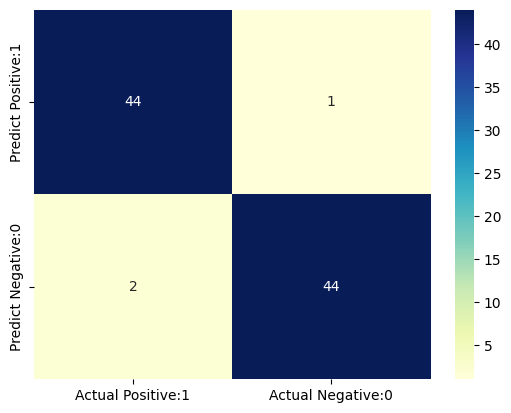

In [ ]:
# visualizar confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

*Balanceamos *

In [ ]:
from sklearn.utils import resample

In [ ]:
df_dataset['Diagnostico'].value_counts()

1    164
0    138
Name: Diagnostico, dtype: int64

In [ ]:
# Separamos las clases
df_majority = df_dataset[df_dataset.Diagnostico==1]
df_minority = df_dataset[df_dataset.Diagnostico==0]

# Upsample minority class
df_majority_upsampled = resample(df_majority,
                                 replace=True,     # sample with replacement
                                 n_samples=138,    # to match majority class
                                 random_state=0) # reproducible results

# Combinamos majority class con upsampled minority class
df_upsampled = pd.concat([df_minority, df_majority_upsampled])


In [ ]:
df_upsampled.head(2)

,Unnamed: 0,Edad,Genero,Dolor en pecho,Presión arterial reposo,Colesterol,Glucemia,Resultado ECC Reposo,Frecuencia Cardiaca,Angina por ejercicio,Depresión de ST,Pendiente ST,Numero de vasos,Talasemia,Diagnostico
164,165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
165,166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0


In [ ]:
df_upsampled.Diagnostico.value_counts()

0    138
1    138
Name: Diagnostico, dtype: int64

In [ ]:
X = df_upsampled.drop(['Diagnostico'], axis=1)
y = df_upsampled['Diagnostico']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# chequeamos
X_train.shape, X_test.shape

((193, 14), (83, 14))

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# instanciamos con matriz balanceada
logreg = LogisticRegression(solver='liblinear', random_state=0)
# modelo
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9759


In [ ]:
# Matriz de confusión
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[37  1]
 [ 1 44]]


<Axes: >

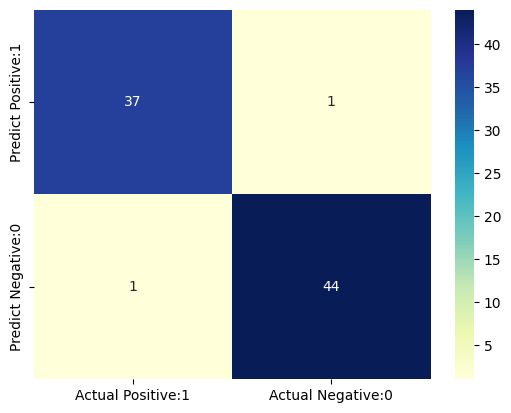

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Informe de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.98      0.98      0.98        45

    accuracy                           0.98        83
   macro avg       0.98      0.98      0.98        83
weighted avg       0.98      0.98      0.98        83



In [ ]:
#Precisión de la clasificación
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification error : 0.0241
Precision : 0.9737
Recall or Sensitivity : 0.9737
False Positive Rate : 0.0222
Specificity : 0.9778


false positive: se define como el ratio entre el número de falsos positivos y el número de negativos (reales).
Lógicamente, el clasificador ideal tendría un FPR de cero (pues no tendría falsos positivos),
y el peor clasificador posible tendría un FPR de uno (todos los negativos reales serían identificados erróneamente como positivos)

In [ ]:
y_test.value_counts()

1    45
0    38
Name: Diagnostico, dtype: int64

In [ ]:
# comprobar la precisión nula
null_accuracy = (45/(45+46))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.4945


In [ ]:
from sklearn.metrics import balanced_accuracy_score, f1_score

# Calcular la precisión balanceada
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
balanced_accuracy

0.9757309941520468

In [ ]:
# Calcular la medida F1
f1 = f1_score(y_test, y_pred_test)
f1

0.9777777777777777

### ROC

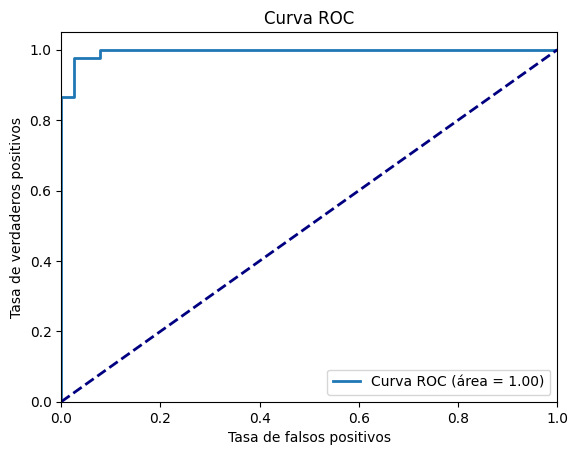

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de la clase positiva
y_score = logreg.predict_proba(X_test)[:,1]

# Calcular los puntos para la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_score)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Dibujar la curva ROC
plt.figure()
plt.plot(fpr, tpr, lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Evaluación


In [ ]:
# calculate cross-validated ROC AUC
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9933


In [ ]:
# Validación cruzada k-fold
# Aplicación de la validación cruzada por quintuplicado

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[1.         1.         0.94871795 0.89473684 0.94736842]


In [ ]:
#Podemos resumir la precisión de la validación cruzada calculando su media.
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9582


Chequeamos overfitting y underfitting

In [ ]:
#Comparamos la precisión del conjunto de entrenamiento y del conjunto de prueba.
y_pred_train = logreg.predict(X_train)


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9741
Test set score: 0.9759


Best params

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros= {
    "penalty" : ['l1','l2'],
    'C':np.logspace(-3,3,7),
}

clf = GridSearchCV(logreg, parametros, scoring="accuracy",cv=25)
clf.fit(X_train, y_train)
print('Hiperparámetros: ', clf.best_params_)
print(clf.best_score_)
print('\n\nEstimador elegido:','\n\n', (clf.best_estimator_))
print('Puntuación del CV de GridSearch en test set: {0:0.4f}'.format(clf.score(X_test, y_test)))


Hiperparámetros:  {'C': 100.0, 'penalty': 'l1'}
0.9885714285714287


Estimador elegido: 

 LogisticRegression(C=100.0, penalty='l1', random_state=0, solver='liblinear')
Puntuación del CV de GridSearch en test set: 0.9880


La precisión de la prueba de nuestro modelo original es de 0,8434, mientras que la precisión de GridSearch CV es de 0,8434. Podemos ver que GridSearch CV no mejora el rendimiento de este modelo en particular.

# -- Arbol de decision --

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Características
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs',
       'restecg', 'thalachh', 'exng', 'oldpeak', 'slp',
       'caa', 'thall',]]

# Variable objetivo
y = df['output']


# dividir entrenamiento prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# entrenar modelo

## "normal  Precisión del modelo: 0.7540983606557377"
# clf = DecisionTreeClassifier(random_state=42)

## 4 niveles precision 0.8524590163934426
# clf = DecisionTreeClassifier(max_depth=4, random_state=42)

## 4 niveles con gini  precision 0.8524590163934426
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

## 4 niveles con entropia precision 0.885245901639344
# clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

## MSE  no se usa porque es para regresion



clf.fit(X_train, y_train)


# predecir

y_pred = clf.predict(X_test)


# Evaluar rendimiento con test set

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')


#  Asegúrate de ajustar los parámetros del árbol de decisión y de realizar una validación cruzada si es necesario para obtener un modelo óptimo.
# También puedes visualizar el árbol de decisión para comprender mejor cómo toma decisiones.

Precisión del modelo: 0.8360655737704918


graficos del modelo

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un pairplot del DataFrame X
sns.pairplot(X)
plt.show()

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7dbce60f9a20> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualiza el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()


## Analisis de caracteristicas

### PairPLot

In [ ]:
# Genera un informe de perfil
profile = ProfileReport(df, title="Informe de Perfil", explorative=True)

# Muestra el informe en el cuaderno de Colab
profile.to_notebook_iframe()

## Validacion cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
mean_accuracy = cross_val_scores.mean()
std_accuracy = cross_val_scores.std()
print(f'Precisión promedio de la validación cruzada: {mean_accuracy:.4f}')
print(f'Desviación estándar de la precisión: {std_accuracy:.4f}')


## Existe alguna combinacion mejor de hiperparametros?




In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los valores a probar para cada hiperparámetro
param_grid = {
    'max_depth': [3, 4, 5, 6,7],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kf, scoring='accuracy')

# Realizar la búsqueda en la cuadrícula
grid_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:")
print(best_params)


best_score = grid_search.best_score_
print(f"Mejor puntuación de rendimiento: {best_score:.4f}")



In [ ]:
from sklearn.model_selection import learning_curve

# Define el modelo
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Define la métrica que deseas evaluar (en este caso, accuracy)
scoring = 'accuracy'

# Genera las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=kf, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcula las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotea la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntaje ({})".format(scoring))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntaje de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntaje de Validación")

plt.legend(loc="best")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Entrenar un modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance = clf.feature_importances_

# Obtener los nombres de las características
feature_names = X_train.columns

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenar las características por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Imprimir la tabla de importancia de características
print(importance_df)


# Determinar cuántas características conservar
num_features_to_keep = len(importance_df) // 2 #(la mitad)

# Seleccionar las características más importantes
selected_features = importance_df['Feature'][:num_features_to_keep]

# Crear un nuevo DataFrame con las características seleccionadas
X_selected = X[selected_features]


# Dividir el conjunto de datos de características seleccionadas en entrenamiento y prueba
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión en el conjunto de características seleccionadas
clf_selected = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf_selected.fit(X_train_selected, y_train)

# Predecir con el conjunto de prueba de características seleccionadas
y_pred_selected = clf_selected.predict(X_test_selected)

# Calcular la precisión del modelo en el conjunto de prueba de características seleccionadas
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print()
print(f'Precisión del modelo con características seleccionadas: {accuracy_selected}')

## Combinar seleccion de hiperparametros y seleccion de caracteristicas

In [ ]:
# Definir el espacio de hiperparámetros para la búsqueda en la cuadrícula
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en la cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Los mejores hiperparámetros encontrados son: {best_params}')

# Entrenar el modelo de árbol de decisión con los mejores hiperparámetros
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = best_clf.predict(X_test)

# Calcular la precisión del modelo con los mejores hiperparámetros
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo con mejores hiperparámetros: {accuracy}')

# Obtener la importancia de las características
feature_importance = best_clf.feature_importances_

# Obtener los nombres de las características
feature_names = X_train.columns

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenar las características por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)



# Determinar cuántas características conservar
num_features_to_keep = len(importance_df) // 2 #(la mitad)

# Seleccionar las características más importantes
selected_features = importance_df['Feature'][:num_features_to_keep]

# Crear un nuevo DataFrame con las características seleccionadas
X_selected = X[selected_features]

# Dividir el conjunto de datos de características seleccionadas en entrenamiento y prueba
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión en el conjunto de características seleccionadas
clf_selected = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf_selected.fit(X_train_selected, y_train)

# Predecir con el conjunto de prueba de características seleccionadas
y_pred_selected = clf_selected.predict(X_test_selected)

# Calcular la precisión del modelo en el conjunto de prueba de características seleccionadas
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print()
print(f'Precisión del modelo con características seleccionadas: {accuracy_selected}')


# -- xgboost --

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador XGBoost
model = xgb.XGBClassifier()

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


from sklearn.metrics import roc_curve, roc_auc_score

probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()



from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, probs)
average_precision = average_precision_score(y_test, probs)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Exhaustividad (Recall)')
plt.ylabel('Precisión')
plt.title(f'Curva Precisión-Recall (AP = {average_precision:.2f})')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()




# Widget para ingresar valores manualmente

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder



# Cargar el modelo entrenado (reemplaza 'mi_modelo.pkl' con tu modelo entrenado)
# clf = DecisionTreeClassifier()  # Carga tu modelo aquí

# crear widgets 2
age = widgets.IntSlider(value=50, min=20, max=100, description='Edad:')
sex = widgets.RadioButtons(options=['Masculino', 'Femenino'], description='Sexo:')
cp = widgets.Dropdown(options=['Angina Típica', 'Angina Atípica', 'Dolor no Anginoso', 'Asintomático'],
                      description='Tipo de Dolor en el Pecho:')
trtbps = widgets.IntSlider(value=120, min=90, max=200, description='Presión Arterial en Reposo:')
chol = widgets.IntSlider(value=200, min=100, max=400, description='Colesterol (mg/dL):')
fbs = widgets.RadioButtons(options=[0, 1], description='Azúcar en Sangre en Ayunas (0 = No, 1 = Sí):'
              ,layout=widgets.Layout(width='600px'))
restecg = widgets.Dropdown(options=['Normal', 'ST-T Anormal', 'Probable o Definitiva Hipertrofia LV'], description='Electrocardiograma en Reposo:')
thalachh = widgets.IntSlider(value=150, min=70, max=210, description='Frecuencia Cardíaca Máxima:')
exng = widgets.RadioButtons(options=[0, 1], description='Angina Inducida por Ejercicio (0 = No, 1 = Sí):')
oldpeak = widgets.FloatSlider(value=1.0, min=0.0, max=6.2, description='Depresión del ST inducida por el Ejercicio:')
slp = widgets.Dropdown(options=[0, 1, 2], description='Inclinación del Segmento ST:')
caa = widgets.IntSlider(value=0, min=0, max=3, description='Vasos Mayores Coloreados por la Fluroscopía:')
thall = widgets.IntSlider(value=2, min=0, max=3, description='Resultados del Estudio con Talio:')




# Crear función para realizar predicción
def predict(sender):

# Borrar la salida anterior

 # Obtener valores de los widgets
    age_val = age.value
    sex_val = 1 if sex.value == 'Masculino' else 0
    label_encoder = LabelEncoder()
    cp_val = label_encoder.fit_transform([cp.value])[0]
    restecg_val = label_encoder.fit_transform([restecg.value])[0]
    thall_val = label_encoder.fit_transform([thall.value])[0]
    trtbps_val = trtbps.value
    chol_val = chol.value
    fbs_val = fbs.value
    thalachh_val = thalachh.value
    exng_val = exng.value
    oldpeak_val = oldpeak.value
    slp_val = slp.value
    caa_val = caa.value



    # Crear un DataFrame con los valores del usuario
    new_patient_data = pd.DataFrame({
        'age': [age_val],
        'sex': [sex_val],
        'cp': [cp_val],
        'trtbps': [trtbps_val],
        'chol': [chol_val],
        'fbs': [fbs_val],
        'restecg': [restecg_val],
        'thalachh': [thalachh_val],
        'exng': [exng_val],
        'oldpeak': [oldpeak_val],
        'slp': [slp_val],
        'caa': [caa_val],
        'thall': [thall_val]

    })

    # Realizar la predicción con el modelo
    prediction = clf.predict(new_patient_data)

    # Muestra el resultado de la predicción
    print(f'El paciente tiene una probabilidad de ataque al corazón de: {prediction[0]}')

# Crear botón para realizar la predicción
predict_button = widgets.Button(description='Realizar Predicción')
predict_button.on_click(predict)

# Mostrar widgets en el entorno de Colab
# Mostrar todos los widgets en una sola línea
display(age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, predict_button)



# AutoML

In [ ]:
!pip install sweetviz


In [ ]:
import sweetviz as sw
import pandas as pd


In [ ]:
data = df2
data.head()

,Edad,Genero,Dolor en pecho,Presión arterial reposo,Colesterol,Glucemia,Resultado ECC Reposo,Frecuencia Cardiaca,Angina por ejercicio,Depresión de ST,Pendiente ST,Numero de vasos,Talasemia,Diagnostico
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Análisis de Datos
reporte_analisis =sw.analyze(data)
reporte_analisis.show_html ('output.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report output.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
pip install pycaret

In [ ]:
import pycaret
pycaret.__version__

'3.1.0'

In [ ]:
pip install mlflow

In [ ]:
# !pip install pycaret
# import pycaret classification and init setup
# from pycaret.classification import *
# s = setup(data, target = 'Diagnostico', session_id = 123,log_experiment=True, experiment_name='Ataques cardiacos',
#              fix_imbalance = True)

# Instalar PyCaret si aún no lo has hecho
!pip install pycaret

# Importar las funciones necesarias de PyCaret
from pycaret.classification import *

# Configurar PyCaret y crear el modelo
s = setup(data, target='Diagnostico', session_id=123, log_experiment=True, experiment_name='Ataques cardiacos', fix_imbalance=True)

# Resto de tu código para entrenar el modelo y hacer predicciones
# ...


,Description,Value
0,Session id,123
1,Target,Diagnostico
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(321, 14)"
5,Transformed train set shape,"(230, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


2023/10/09 02:17:19 INFO mlflow.tracking.fluent: Experiment with name 'Ataques cardiacos' does not exist. Creating a new experiment.


In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# init setup on exp
exp.setup(data, target = 'Diagnostico', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Diagnostico
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8297,0.9194,0.8576,0.8396,0.8375,0.6553,0.6742,0.1300
lr,Logistic Regression,0.8294,0.9171,0.8750,0.8236,0.8415,0.6543,0.6710,0.7580
ridge,Ridge Classifier,0.8156,0.0000,0.8841,0.8019,0.8328,0.6249,0.6480,0.1380
lda,Linear Discriminant Analysis,0.8156,0.9143,0.8841,0.8019,0.8328,0.6249,0.6480,0.1470
et,Extra Trees Classifier,0.8061,0.8846,0.8424,0.8095,0.8205,0.6082,0.6171,0.3870
xgboost,Extreme Gradient Boosting,0.8017,0.8493,0.8508,0.8056,0.8193,0.5969,0.6144,0.1620
rf,Random Forest Classifier,0.8015,0.8954,0.8424,0.8088,0.8163,0.5981,0.6140,0.4490
qda,Quadratic Discriminant Analysis,0.7968,0.9015,0.7985,0.8311,0.8053,0.5902,0.6016,0.0750
gbc,Gradient Boosting Classifier,0.7835,0.8835,0.8265,0.7950,0.8024,0.5608,0.5758,0.4620
lightgbm,Light Gradient Boosting Machine,0.7734,0.8700,0.7902,0.8025,0.7862,0.5427,0.5586,0.3260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP Usar OOP en la comparación de modelos en PyCaret puede ser especialmente útil cuando necesitas automatizar la selección y evaluación de modelos en diferentes escenarios o para diferentes conjuntos de datos

exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8201,0.9212,0.8576,0.8186,0.8303,0.6358,0.6510,0.0440
ridge,Ridge Classifier,0.8201,0.0000,0.8841,0.8069,0.8359,0.6346,0.6558,0.0500
rf,Random Forest Classifier,0.8201,0.8924,0.8583,0.8236,0.8335,0.6349,0.6474,0.3680
lda,Linear Discriminant Analysis,0.8201,0.9162,0.8841,0.8069,0.8359,0.6346,0.6558,0.0310
lr,Logistic Regression,0.8154,0.9180,0.8750,0.8061,0.8310,0.6245,0.6463,0.1330
et,Extra Trees Classifier,0.8108,0.9003,0.8508,0.8150,0.8240,0.6180,0.6342,0.1800
qda,Quadratic Discriminant Analysis,0.8013,0.9013,0.8152,0.8273,0.8112,0.5986,0.6111,0.0300
gbc,Gradient Boosting Classifier,0.7972,0.8802,0.8152,0.8122,0.8084,0.5900,0.5992,0.1110
xgboost,Extreme Gradient Boosting,0.7970,0.8618,0.8417,0.8072,0.8137,0.5875,0.6070,0.0590
lightgbm,Light Gradient Boosting Machine,0.7872,0.8706,0.8152,0.8199,0.8024,0.5683,0.5907,0.0720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

Análisis del Modelo

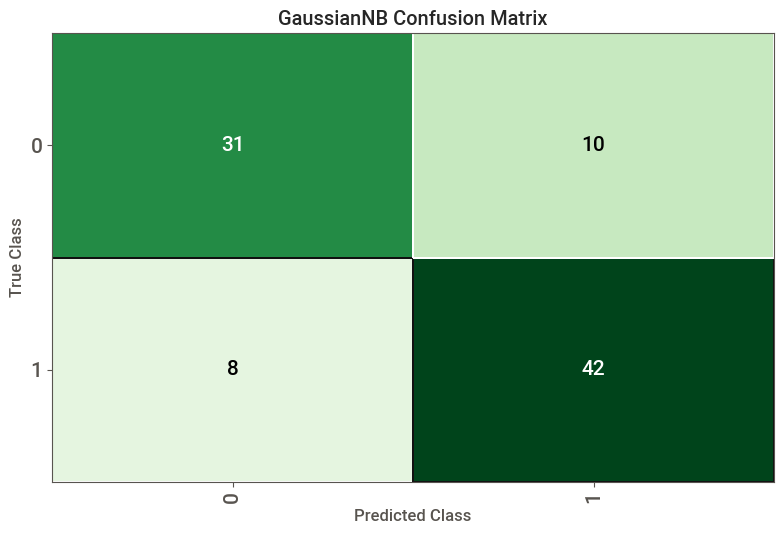

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')



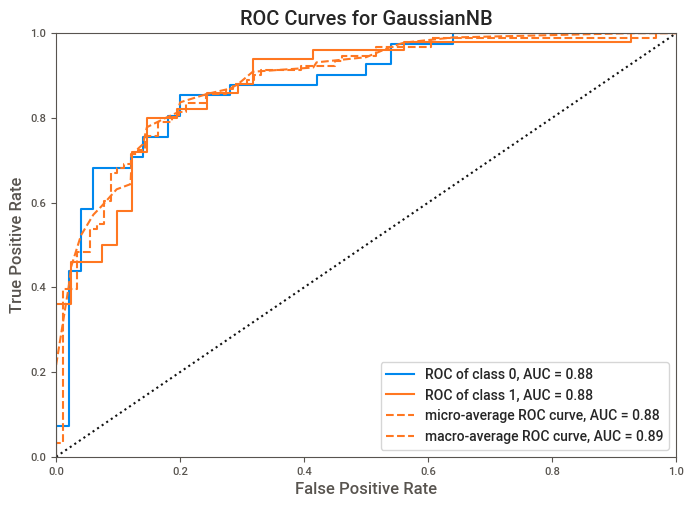

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

Predicción del Modelo


In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8022,0.8815,0.8400,0.8077,0.8235,0.5987,0.5993


In [ ]:
# show predictions df
holdout_pred.head()

,Edad,Genero,Dolor en pecho,Presión arterial reposo,Colesterol,Glucemia,Resultado ECC Reposo,Frecuencia Cardiaca,Angina por ejercicio,Depresión de ST,Pendiente ST,Numero de vasos,Talasemia,Diagnostico,prediction_label,prediction_score
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0,0,1.0000
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0,1,0.6264
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1,1,0.9239
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1,1,0.9396
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1,0.6316


Crear Modelo

In [ ]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9917,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.8636,0.9583,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.9048,0.9815,0.8333,1.0000,0.9091,0.8108,0.8257
3,0.8095,0.9444,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
5,0.8571,0.9364,0.8182,0.9000,0.8571,0.7149,0.7182
6,0.9048,0.9091,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8182,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9364,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.8182,0.9833,1.0000,0.7500,0.8571,0.6207,0.6708
2,0.9048,0.9630,1.0000,0.8571,0.9231,0.8000,0.8165
3,0.8095,0.8981,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9444,0.7500,1.0000,0.8571,0.7200,0.7500
5,0.8571,0.9000,0.9091,0.8333,0.8696,0.7123,0.7156
6,0.8571,0.9455,1.0000,0.7857,0.8800,0.7097,0.7416
7,0.6667,0.8273,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8095,0.9364,0.9091,0.7692,0.8333,0.6147,0.6264


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.9091,0.9833,1.0000,0.8571,0.9231,0.8136,0.8281
2,0.9048,0.9630,1.0000,0.8571,0.9231,0.8000,0.8165
3,0.8095,0.8889,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9722,0.7500,1.0000,0.8571,0.7200,0.7500
5,0.8095,0.8909,0.8182,0.8182,0.8182,0.6182,0.6182
6,0.9048,0.9273,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8000,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9636,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm']

In [ ]:
whitelist = models(type='ensemble').index.tolist()

In [ ]:
ensembled_models = compare_models(whitelist, fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8019,0.8632,0.8171,0.8190,0.8174,0.6006,0.6017,0.1267
et,Extra Trees Classifier,0.8019,0.8892,0.8088,0.8257,0.8162,0.6010,0.6027,0.2167
rf,Random Forest Classifier,0.8018,0.8867,0.8345,0.8068,0.8200,0.5995,0.6007,0.2600
lightgbm,Light Gradient Boosting Machine,0.7970,0.8616,0.8255,0.8056,0.8143,0.5901,0.5926,0.0967
xgboost,Extreme Gradient Boosting,0.7924,0.8567,0.7996,0.8159,0.8067,0.5821,0.5839,0.0667
ada,Ada Boost Classifier,0.7500,0.8233,0.7908,0.7601,0.7741,0.4938,0.4964,0.1333


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

Optimización de Hiperparámetros

In [ ]:
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9917,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.8636,0.9583,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.9048,0.9815,0.8333,1.0000,0.9091,0.8108,0.8257
3,0.8095,0.9444,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
5,0.8571,0.9364,0.8182,0.9000,0.8571,0.7149,0.7182
6,0.9048,0.9091,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8182,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9364,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.9917,1.0000,0.9231,0.9600,0.9076,0.9115
1,0.9091,0.9917,1.0000,0.8571,0.9231,0.8136,0.8281
2,0.9048,0.9537,1.0000,0.8571,0.9231,0.8000,0.8165
3,0.8095,0.8704,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9444,0.7500,1.0000,0.8571,0.7200,0.7500
5,0.8095,0.9000,0.8182,0.8182,0.8182,0.6182,0.6182
6,0.9048,0.9273,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8091,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9545,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,1.0000,1.0000,0.9231,0.9600,0.9076,0.9115
1,0.8182,0.9833,1.0000,0.7500,0.8571,0.6207,0.6708
2,0.9048,0.9722,0.9167,0.9167,0.9167,0.8056,0.8056
3,0.8095,0.9259,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8095,0.9630,0.7500,0.9000,0.8182,0.6216,0.6331
5,0.8095,0.9182,0.8182,0.8182,0.8182,0.6182,0.6182
6,0.9048,0.9273,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.7143,0.8182,0.8182,0.6923,0.7500,0.4220,0.4301
8,0.9048,0.9636,1.0000,0.8462,0.9167,0.8073,0.8228


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Ensamble

In [ ]:
models()


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
bagged_nb = ensemble_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.9917,1.0000,0.9231,0.9600,0.9076,0.9115
1,0.8636,0.9667,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.9048,0.9444,0.8333,1.0000,0.9091,0.8108,0.8257
3,0.8571,0.9259,1.0000,0.8000,0.8889,0.6957,0.7303
4,0.7619,0.9352,0.6667,0.8889,0.7619,0.5333,0.5556
5,0.9048,0.9455,0.9091,0.9091,0.9091,0.8091,0.8091
6,0.9048,0.9000,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.7143,0.7636,0.8182,0.6923,0.7500,0.4220,0.4301
8,0.8571,0.9545,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
boosted_lr = ensemble_model(lr, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.8636,0.9500,0.9167,0.8462,0.8800,0.7227,0.7258
2,0.8571,0.9630,1.0000,0.8000,0.8889,0.6957,0.7303
3,0.8571,0.9074,1.0000,0.8000,0.8889,0.6957,0.7303
4,0.9524,1.0000,0.9167,1.0000,0.9565,0.9041,0.9083
5,0.8095,0.8818,0.8182,0.8182,0.8182,0.6182,0.6182
6,0.8571,0.9182,0.9091,0.8333,0.8696,0.7123,0.7156
7,0.6667,0.7273,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8095,0.9636,0.9091,0.7692,0.8333,0.6147,0.6264


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Blend Models

In [ ]:
blender = blend_models(estimator_list = [boosted_lr, bagged_nb, tuned_lr], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,1.0000,1.0000,0.9231,0.9600,0.9076,0.9115
1,0.8636,0.9917,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
3,0.8571,0.9074,1.0000,0.8000,0.8889,0.6957,0.7303
4,0.8095,0.9722,0.7500,0.9000,0.8182,0.6216,0.6331
5,0.9048,0.9364,0.9091,0.9091,0.9091,0.8091,0.8091
6,0.9048,0.9182,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.7909,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9727,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Stacking

In [ ]:
stacker = stack_models(estimator_list = [boosted_lr,bagged_nb,tuned_lr], meta_model=lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.8636,0.9833,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.9048,0.9630,1.0000,0.8571,0.9231,0.8000,0.8165
3,0.8095,0.9074,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9722,0.7500,1.0000,0.8571,0.7200,0.7500
5,0.8095,0.9000,0.8182,0.8182,0.8182,0.6182,0.6182
6,0.9048,0.9182,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8000,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9636,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Calibración

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9917,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.8636,0.9583,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.9048,0.9815,0.8333,1.0000,0.9091,0.8108,0.8257
3,0.8095,0.9444,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
5,0.8571,0.9364,0.8182,0.9000,0.8571,0.7149,0.7182
6,0.9048,0.9091,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8182,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9364,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

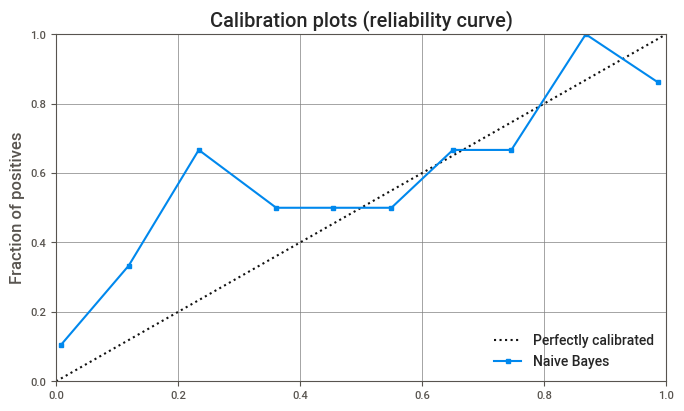

In [ ]:
nb = create_model('nb')
plot_model(nb, plot='calibration')

In [ ]:
calibrated_nb = calibrate_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.9917,1.0000,0.9231,0.9600,0.9076,0.9115
1,0.8636,0.9500,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.9048,0.9815,0.8333,1.0000,0.9091,0.8108,0.8257
3,0.8095,0.9444,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8095,0.9722,0.7500,0.9000,0.8182,0.6216,0.6331
5,0.8571,0.9455,0.8182,0.9000,0.8571,0.7149,0.7182
6,0.9048,0.9091,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8091,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9455,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

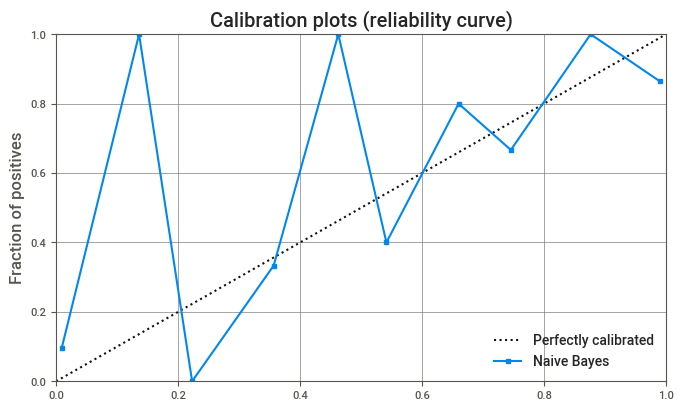

In [ ]:
plot_model(calibrated_nb, plot='calibration')

Analisis del Modelo

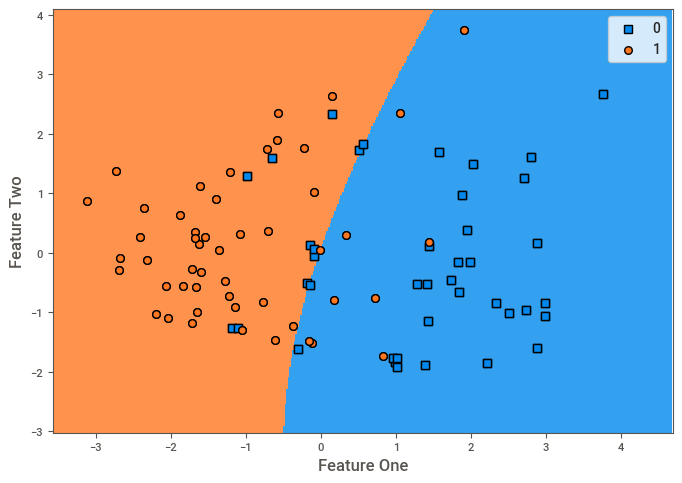

In [ ]:
plot_model(nb, plot = 'boundary')

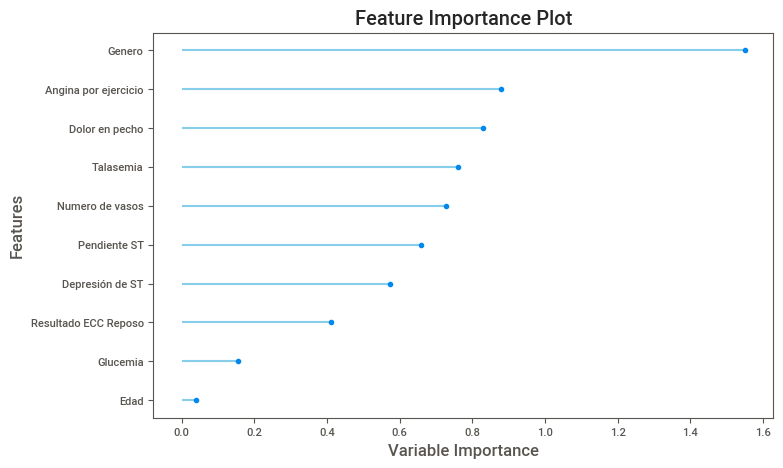

In [ ]:
plot_model(lr, plot = 'feature')

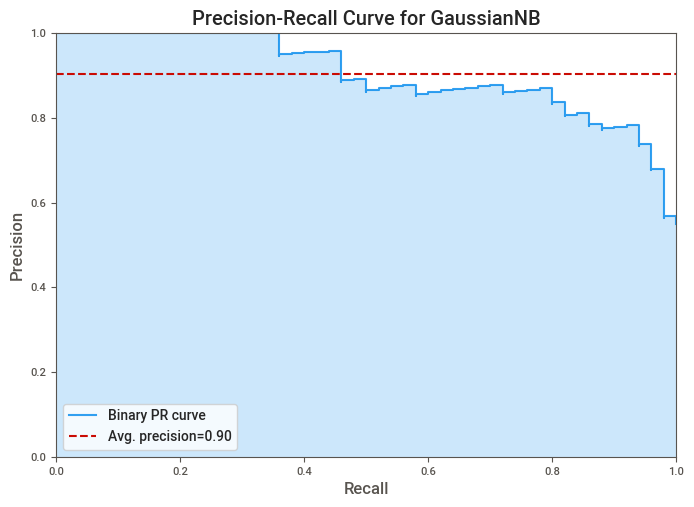

In [ ]:
plot_model(nb, plot = 'pr')

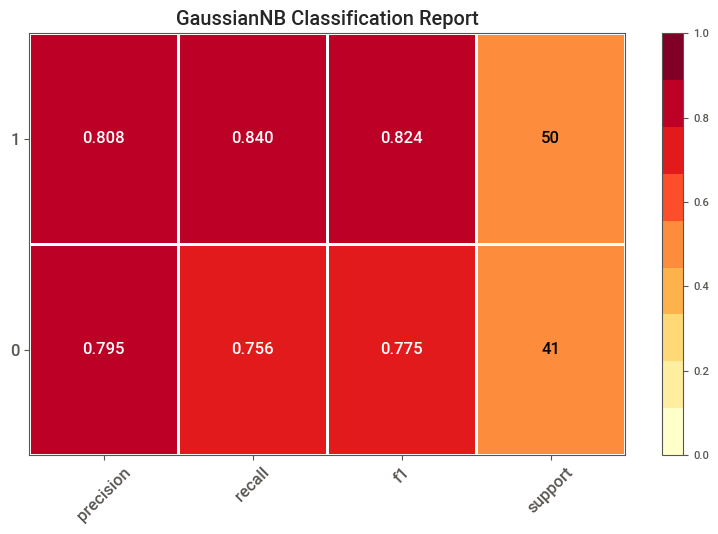

In [ ]:
plot_model(nb, plot = 'class_report')

Interpretación del modelo

In [ ]:
# create a model
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.9091,0.9833,1.0000,0.8571,0.9231,0.8136,0.8281
2,0.9048,0.9630,1.0000,0.8571,0.9231,0.8000,0.8165
3,0.8095,0.8889,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9722,0.7500,1.0000,0.8571,0.7200,0.7500
5,0.8095,0.8909,0.8182,0.8182,0.8182,0.6182,0.6182
6,0.9048,0.9273,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8000,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9636,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/4 [00:00<?, ?it/s]